In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import quantecon as qe
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

In [7]:
oil = pd.read_stata('/home/alvin/Desktop/Python/Oil.dta')
oil = oil['spot']
oil = pd.DataFrame(oil, columns=['spot'])
oil

,spot
0,18.580000
1,18.540001
2,18.600000
3,18.700001
4,18.750000
...,...
1377,108.634003
1378,110.304001
1379,110.285004
1380,107.821999


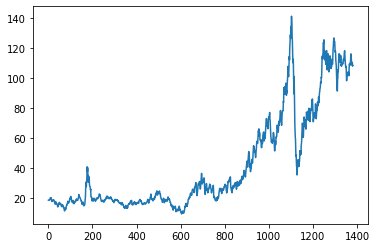

In [14]:
plt.plot(oil);

# Análisis de la FAS y FAP

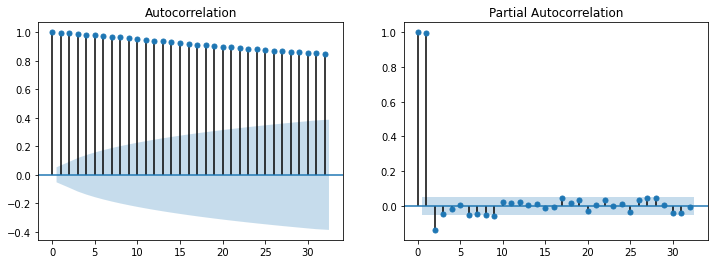

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

# ACF chart
fig = sm.graphics.tsa.plot_acf(oil.spot.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(oil.spot.dropna(), ax=ax2)
# ignorar el primero

# Análisis de la Prueba Dickey Fuller

In [17]:
test_DF = sm.tsa.stattools.adfuller(oil.spot.dropna(), regression='nc')
# mientas más a la izquierda es mejor
# Si la series ya es estacionaria, no hay más que hacer
print('ADF Statistic: %f' % test_DF[0])
print('p-value: %f' % test_DF[0])
print('Critical Values:')
for key, value in test_DF[4].items():
    print('\t%s: %.3f' % (key,value))
    
if test_DF[0] < test_DF[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')
    
    
# Debemos ver cómo analizar lo de las diferencias, el profesor le agrega diferencias

ADF Statistic: -0.077142
p-value: -0.077142
Critical Values:
	1%: -2.567
	5%: -1.941
	10%: -1.617
Failed to Reject Ho - Times series Non-Stationary


In [18]:
oil['pct_ch'] = oil.spot.pct_change()
oil

,spot,pct_ch
0,18.580000,NaN
1,18.540001,-0.002153
2,18.600000,0.003236
3,18.700001,0.005376
4,18.750000,0.002674
...,...,...
1377,108.634003,-0.001544
1378,110.304001,0.015373
1379,110.285004,-0.000172
1380,107.821999,-0.022333


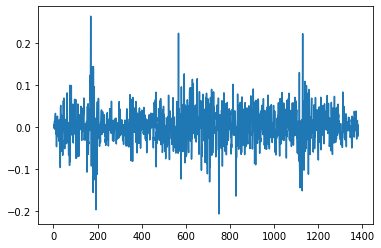

In [20]:
plt.plot(oil.pct_ch);

In [28]:
test_DF = sm.tsa.stattools.adfuller(oil.pct_ch.dropna(), regression='ct')
# mientas más a la izquierda es mejor
# Si la series ya es estacionaria, no hay más que hacer
print('ADF Statistic: %f' % test_DF[0])
print('p-value: %f' % test_DF[0])
print('Critical Values:')
for key, value in test_DF[4].items():
    print('\t%s: %.3f' % (key,value))
    
if test_DF[0] < test_DF[4]['5%']:
    print('Reject Ho - Time series is Stationary')
else:
    print('Failed to Reject Ho - Times series Non-Stationary')
    
    
# Debemos ver cómo analizar lo de las diferencias, el profesor le agrega diferencias

ADF Statistic: -17.194051
p-value: -17.194051
Critical Values:
	1%: -3.965
	5%: -3.414
	10%: -3.129
Reject Ho - Time series is Stationary


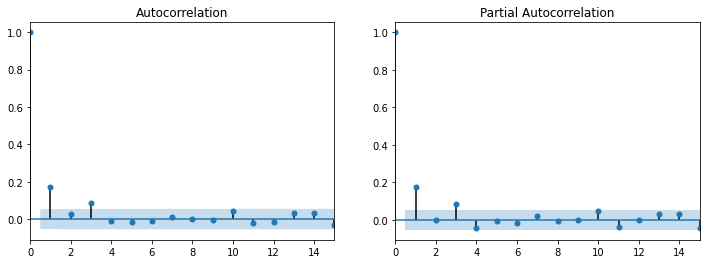

In [22]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.set_xlim([0,15])
ax2.set_xlim([0,15])
# ACF chart
fig = sm.graphics.tsa.plot_acf(oil.pct_ch.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(oil.pct_ch.dropna(), ax=ax2)
# ignorar el primero

# Vemos que puede ser un ARMA

In [41]:
mod = ARMA(oil.pct_ch.dropna(), order=(0,3))
result = mod.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                 pct_ch   No. Observations:                 1381
Model:                     ARMA(0, 3)   Log Likelihood                2445.501
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 31 May 2020   AIC                          -4881.002
Time:                        20:32:13   BIC                          -4854.849
Sample:                             0   HQIC                         -4871.219
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0022      0.001      1.512      0.131      -0.001       0.005
ma.L1.pct_ch     0.1770      0.027      6.620      0.000       0.125       0.229
ma.L2.pct_ch     0.0148      0.027      0.54

/home/alvin/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


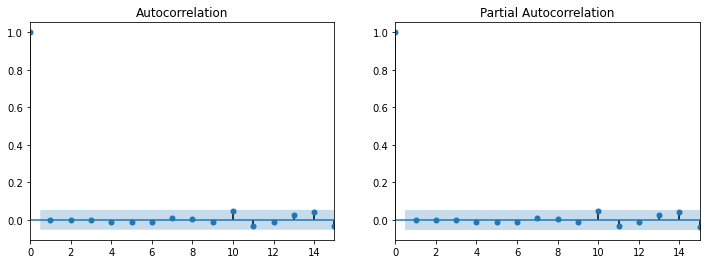

In [42]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.set_xlim([0,15])
ax2.set_xlim([0,15])
# ACF chart
fig = sm.graphics.tsa.plot_acf(result.resid.dropna(), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(result.resid.dropna(), ax=ax2)
# ignorar el primero

# El mejor modelo que lo explica es un MA(1,3)

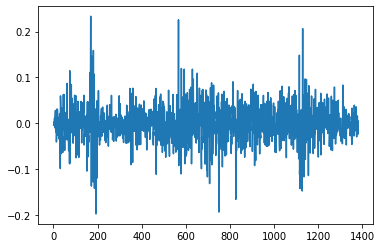

In [43]:
plt.plot(result.resid)
# Al analizar la serie de residuos generados por el modelo, podemos ver que el gráfico
# nos suguere que la serie sigue un proceso de 
# heterocedasticidad condicional autorregresivo

# Residuos al cuadrado

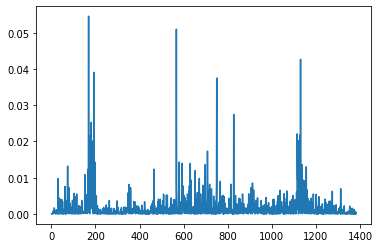

In [45]:
# entonces para confirmar vermos el comportamiento de los residuos al cuadrado
plt.plot(np.square(result.resid));

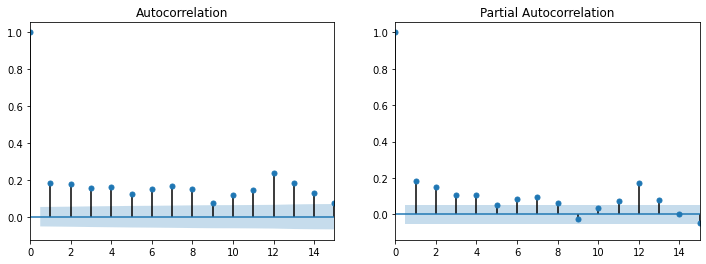

In [46]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.set_xlim([0,15])
ax2.set_xlim([0,15])
# ACF chart
fig = sm.graphics.tsa.plot_acf(np.square(result.resid.dropna()), ax=ax1)
# PACF chart
fig = sm.graphics.tsa.plot_pacf(np.square(result.resid.dropna()), ax=ax2)
# ignorar el primero